In [1]:
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,models,optimizers
from keras import backend as K
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.utils import load_img,img_to_array
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
model=VGG16(weights='imagenet')

In [3]:
img_path='C:\programowanie\python\deep learning\\5\\10023.jpg'
img=load_img(img_path,target_size=(224,224))

x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [4]:
#trenowanie i przewidywanie
preds=model.predict(x)
print('Predicted:',decode_predictions(preds,top=3)[0])
np.argmax(preds[0])

C:\Users\abuka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted: [('n02109047', 'Great_Dane', 0.40529603), ('n02093428', 'American_Staffordshire_terrier', 0.18131942), ('n02093256', 'Staffordshire_bullterrier', 0.12542632)]


246

In [5]:
dog_output=model.output[:,386]
last_conv_layer=model.get_layer('block5_conv3')
grads=K.gradients(dog_output,last_conv_layer.output)[0]
pooled_grads=K.mean(grads,axis=(0,1,2))
iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value=iterate([x])
for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]


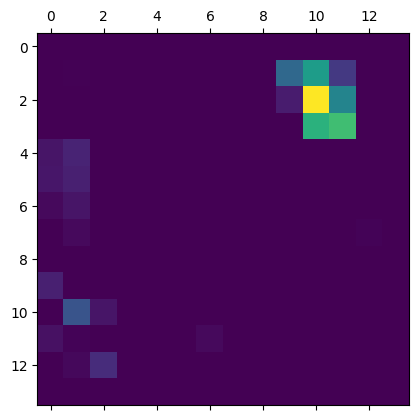

In [6]:
heatmap=np.mean(conv_layer_output_value,axis=-1)
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [7]:
import cv2
img=cv2.imread(img_path)
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
superimposed_img=heatmap*0.4+img
cv2.imwrite('C:\programowanie\python\deep learning\\5\\img_out.jpg', superimposed_img)




True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


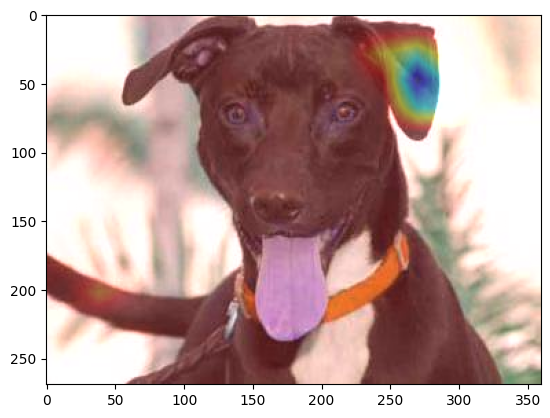

In [8]:
img_tensor=img_to_array(superimposed_img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
plt.imshow(img_tensor[0])
plt.show()